# Optimizer from scratch

In this take-home project, you will solve very fun optimization problem!

In [1]:
import numpy as np
import numpy.testing as npt

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import torch
from torch import optim

In [2]:
torch.manual_seed(42)
np.random.seed(42)

# Windy Rosenbrock valley Problem

There is a valley called 'Rosenbrock'.

Due to the global warming, the climate changes in unexpected way.

Currently, the valley is quite windy in the **positive direction along x-axis**.

We want to get through the bad climate and reach the global minimum point.

Implement your own optimizer in numpy, and provide reason for it.

## Rosenbrock definition

In [3]:
# This is called Rosenbrock function
# https://en.wikipedia.org/wiki/Rosenbrock_function

a = 1
b = 50

def rosenbrock(x, y):
    return (a - x) ** 2 + b * (y - x ** 2) ** 2

### Surface

In [4]:
xs, ys = np.meshgrid(np.arange(-10., 10., 0.1), np.arange(-10, 10., 0.1))
zs = rosenbrock(xs, ys)

surface = [xs, ys, zs]

### Global min

In [5]:
g_min_x = a
g_min_y = a**2
g_min_z = rosenbrock(g_min_x, g_min_y)

g_min = [g_min_x, g_min_y, g_min_z]

### Plot

In [6]:
def rosenbrock_plot(start_, g_min_, surface_):
    plt.figure(figsize=(8, 15))
    ax = plt.axes(projection='3d', elev=50, azim=80)

    ax.plot(*g_min_, 'r*', markersize=8)
    ax.plot(*start_, 'b*', markersize=8)

    ax.plot_surface(
        *surface_,
        norm=LogNorm(), rstride=1, cstride=1,
        edgecolor='None', alpha=0.3, cmap=plt.cm.jet
    )

    ax.set_title("Rosenbrock Function Visualization")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
    return ax

### Problem setting

In [7]:
# Starting point

s_x, s_y  = (-4., -4.)
s_z = rosenbrock(s_x, s_y)

start = [s_x, s_y, s_z]

In [8]:
def wind_attack(x, knots=0.003):    
    return x + knots

## Implement your optimizer

In [9]:
class Optimizer:
    # implement your optmizer
    
    def __init__(self, s_x_, s_y_):
        self.params = np.asarray([s_x_, s_y_])
    
    def step(self):
        raise NotImplementedError

## Optimize

In [10]:
def optimize(s_x_, s_y_):
    num_epochs = int(1e4) # as much epochs as you want

    optim_xs = []
    optim_ys = []
    optim_zs = []

    optimizer = Optimizer(s_x_, s_y_)
    for epoch in range(num_epochs):
        ################ code your optimization
        # you don't have to change here if you don't have to
        optimizer.step()
        
        
        
        
        
        ################ don't change below
        
        optimizer.params[0] = wind_attack(optimizer.params[0])

        optim_xs.append(optimizer.params[0])
        optim_ys.append(optimizer.params[1])
        optim_zs.append(optimizer.loss)

    your_path = [optim_xs, optim_ys, optim_zs]
    
    return your_path

## Torch optimization

In [11]:
def torch_optimize(point, num_epochs=int(1e3)):
    torch_s_x = torch.tensor(point[0], requires_grad=True)
    torch_s_y = torch.tensor(point[1], requires_grad=True)
    torch_s_z = torch.tensor(rosenbrock(point[0], point[1]))
    
    optimizer = optim.Rprop([torch_s_x, torch_s_y])
    
    optim_xs = []
    optim_ys = []
    optim_zs = []
    for epoch in range(num_epochs):        
        x_ = torch_s_x.item()
        y_ = torch_s_y.item()
        z_ = rosenbrock(x_, y_)

        optim_xs.append(x_)
        optim_ys.append(y_)
        optim_zs.append(z_)

        rosenbrock_loss = rosenbrock(torch_s_x, torch_s_y)
        optimizer.zero_grad()
        rosenbrock_loss.backward()

        optimizer.step()
        
        
        torch_s_x.data = wind_attack(torch_s_x.data)
    
    return optim_xs, optim_ys, optim_zs

## Plot optimization path

Compare your optimizer with torch's optimizer

**Uncomment comments** to show the plot

In [12]:
torch_path = torch_optimize(start)

In [13]:
# UNCOMMENT below
# your_path = optimize(start)

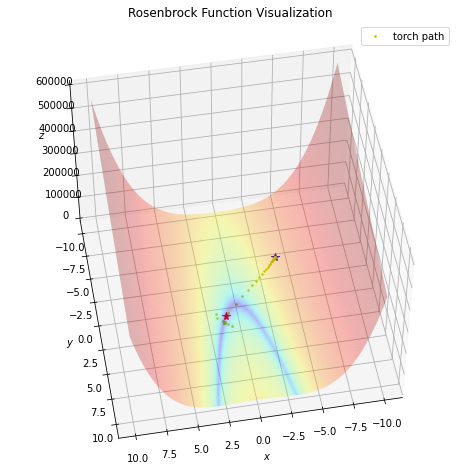

In [14]:
ax = rosenbrock_plot(start, g_min, surface)

# UNCOMMENT below
# ax.plot(*your_path, 'g.', markersize=3, label='your path')
ax.plot(*torch_path, 'y.', markersize=3, label='torch path')
ax.legend()
plt.show()

In [15]:
npt.assert_almost_equal(torch_path[0][-1], g_min_x, decimal=0)
npt.assert_almost_equal(torch_path[1][-1], g_min_y, decimal=0)

In [16]:
npt.assert_almost_equal(your_path[0][-1], g_min_x, decimal=0)
npt.assert_almost_equal(your_path[1][-1], g_min_y, decimal=0)

NameError: name 'your_path' is not defined

## Q. Why did you implement your optimizer this way?

Write your answer.

---

Copyright 2021. KC ML2, Seoul, Korea, All rights reserved.

Inquiry: contact@kc-ml2.com

---